In [2]:
import numpy as np
import pandas as pd

In [31]:
from sklearn.datasets import load_iris
iris=load_iris()
#Exploramos Iris y mostramos sus campos principales
print("Componentes de iris")
for data in iris:
  print(data)
print("Datos de iris")
print(iris.data)
print("Target de iris")
print(iris.target)
print("Nombres de target de iris")
print(iris.target_names)
print("Features de iris")
print(iris.feature_names)

Componentes de iris
data
target
frame
target_names
DESCR
feature_names
filename
data_module
Datos de iris
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 

In [29]:
#Hago un dataframe con pandas llamando a la columna target Species y hago un describe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]

# Ver los primeros registros del nuevo dataset
print("Primeros registros del dataset:")
print(df.head())


Primeros registros del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


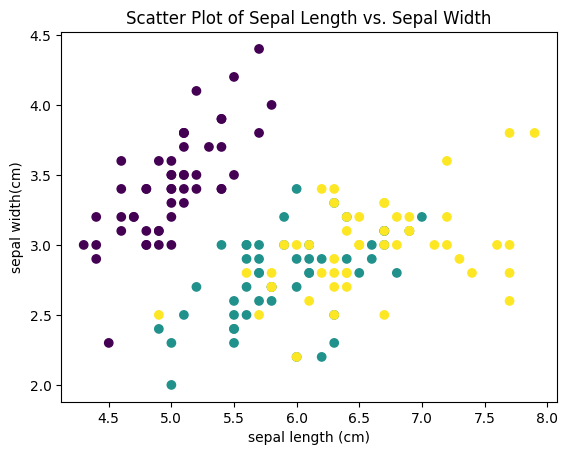

In [33]:
#Muestro con plot la longitud vs el ancho del sepalo separado por Target o tipo de iris
import matplotlib.pyplot as plt
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width(cm)')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=iris.target)


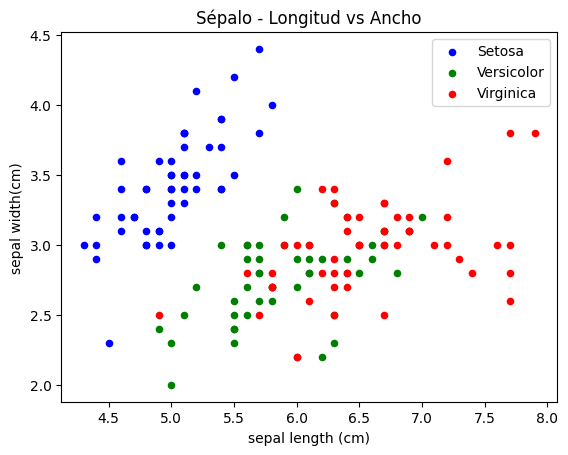

In [53]:
#Muestro con plot la longitud vs el ancho del sepalo separado por Target o tipo de iris y por colores identificando el tipo, se podría mejorar con un bucle for, pero como son solo 3 mejor así
import matplotlib.pyplot as plt
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species']=iris.target
fig=df[df.species==0].plot(kind="scatter",x='sepal length (cm)',y='sepal width (cm)',c='blue',label='Setosa')
df[df.species==1].plot(kind="scatter",x='sepal length (cm)',y='sepal width (cm)',c="green",label="Versicolor",ax=fig)
df[df.species==2].plot(kind="scatter",x='sepal length (cm)',y='sepal width (cm)',c="red",label="Virginica",ax=fig)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width(cm)')
plt.title('Sépalo - Longitud vs Ancho')
plt.show()

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Aquí pruebo el modelo con una regresión logística simple
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
modelo=LogisticRegression()
modelo.fit(x_train,y_train)
print('Precisión Regresión Logística: {}'.format(modelo.score(x_test, y_test)))

Precisión Regresión Logística: 0.9


In [78]:
from sklearn.svm import SVC
#Aquí pruebo el modelo con support vector machines
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
modelo=SVC()
modelo.fit(x_train,y_train)
print('Precisión SVC: {}'.format(modelo.score(x_test, y_test)))

Precisión SVC: 1.0


In [82]:
from sklearn.neighbors import KNeighborsClassifier
#Aquí pruebo el modelo con K Neighbors, lo hago básico, para encontrar el mejor valor de k, podría hacer una grid search
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
modelo=KNeighborsClassifier(n_neighbors=4)
modelo.fit(x_train,y_train)
print('Precisión KNeighbors: {}'.format(modelo.score(x_test, y_test)))

Precisión KNeighbors: 0.9333333333333333


In [83]:
from sklearn import tree
#Aquí pruebo el modelo con Árbol de decisión
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
modelo=tree.DecisionTreeClassifier()
modelo.fit(x_train,y_train)
print('Precisión DecisionTree: {}'.format(modelo.score(x_test, y_test)))

Precisión DecisionTree: 0.9666666666666667


Cómo podemos comprobar, el mejor modelo sin tener que ajustar hiperparámetros ni utilizar técnicas de validación ni fórmulas matemáticas es Support Vector Machines con un acierto del 100%

Ahora voy a probar todo para que con los valores de medidas de los sépalos y esos datos el modelo acierte el tipo de especie de flor de iris

In [99]:
df_sepalo=df[['sepal length (cm)','sepal width (cm)','species']]
print(df_sepalo)

     sepal length (cm)  sepal width (cm)  species
0                  5.1               3.5        0
1                  4.9               3.0        0
2                  4.7               3.2        0
3                  4.6               3.1        0
4                  5.0               3.6        0
..                 ...               ...      ...
145                6.7               3.0        2
146                6.3               2.5        2
147                6.5               3.0        2
148                6.2               3.4        2
149                5.9               3.0        2

[150 rows x 3 columns]


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Aquí pruebo el modelo con una regresión logística simple
x=df_sepalo.drop('species',axis=1)
y=df_sepalo['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
modelo=LogisticRegression()
modelo.fit(x_train,y_train)
print('Precisión Regresión Logística: {}'.format(modelo.score(x_test, y_test)))

Precisión Regresión Logística: 0.8333333333333334


In [104]:
from sklearn.svm import SVC
#Aquí pruebo el modelo con support vector machines
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
modelo=SVC()
modelo.fit(x_train,y_train)
print('Precisión SVC: {}'.format(modelo.score(x_test, y_test)))

Precisión SVC: 0.8


In [113]:
from sklearn.neighbors import KNeighborsClassifier
#Aquí pruebo el modelo con K Neighbors, lo hago básico, para encontrar el mejor valor de k, podría hacer una grid search
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
modelo=KNeighborsClassifier(n_neighbors=5)
modelo.fit(x_train,y_train)
print('Precisión KNeighbors: {}'.format(modelo.score(x_test, y_test)))

Precisión KNeighbors: 0.7666666666666667


In [114]:
from sklearn import tree
#Aquí pruebo el modelo con Árbol de decisión
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
modelo=tree.DecisionTreeClassifier()
modelo.fit(x_train,y_train)
print('Precisión DecisionTree: {}'.format(modelo.score(x_test, y_test)))

Precisión DecisionTree: 0.6333333333333333


Como podemos comprobar aquí el mejor modelo ha sido la Regresión Logística